# Tutorial Implementasi K-Nearest Neighbors (KNN)

## Daftar Isi:
1. Pengenalan KNN
2. Persiapan Data dan Library
3. Implementasi KNN dari Awal (Scratch)
4. Implementasi dengan Scikit-learn
5. Pemilihan Nilai K Optimal
6. Studi Kasus: Klasifikasi Bunga Iris
7. Latihan Mandiri

## 1. Pengenalan KNN

K-Nearest Neighbors (KNN) adalah algoritma machine learning yang sederhana namun powerful untuk klasifikasi dan regresi. Algoritma ini bekerja berdasarkan prinsip bahwa objek yang mirip cenderung berada di dekat satu sama lain.

### Cara Kerja KNN:
1. Hitung jarak antara data baru dengan semua data training
2. Pilih K tetangga terdekat
3. Untuk klasifikasi: voting mayoritas
4. Untuk regresi: rata-rata nilai

### Kelebihan KNN:
- Sederhana dan mudah dipahami
- Tidak ada asumsi tentang data
- Efektif untuk data training kecil
- Dapat digunakan untuk klasifikasi dan regresi

### Parameter Penting:
- K: jumlah tetangga
- Metric jarak (Euclidean, Manhattan, dll)
- Weights (uniform, distance)

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Set random seed untuk reproducibility
np.random.seed(42)

# Untuk menampilkan plot di notebook
%matplotlib inline

## 2. Implementasi KNN dari Awal (Scratch)

Kita akan mengimplementasikan KNN dari awal untuk memahami cara kerjanya secara mendalam. Implementasi ini akan mencakup:
1. Fungsi untuk menghitung jarak
2. Fungsi untuk menemukan K tetangga terdekat
3. Fungsi untuk melakukan voting (klasifikasi)
4. Fungsi untuk menghitung rata-rata (regresi)

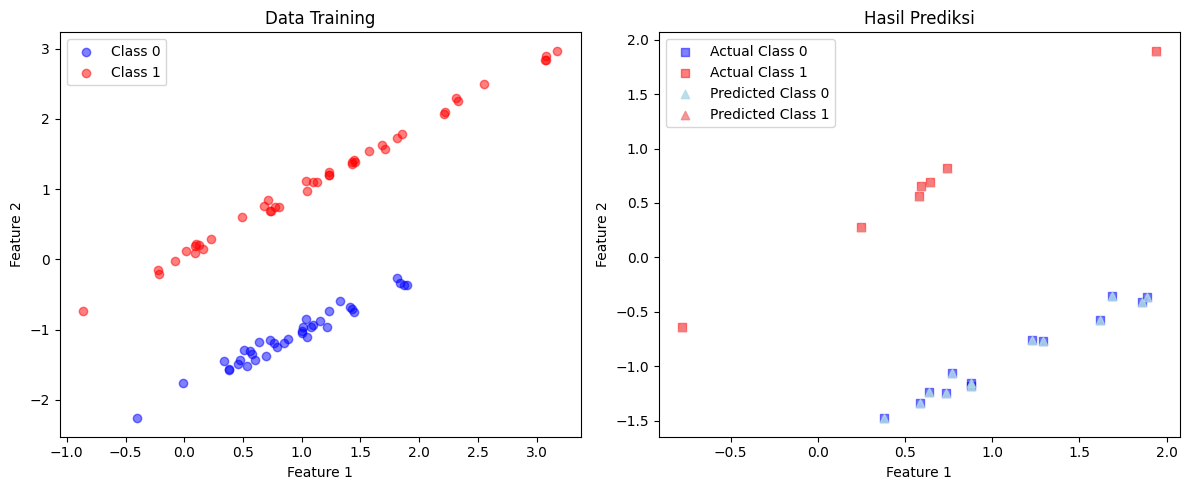

Accuracy: 1.0000


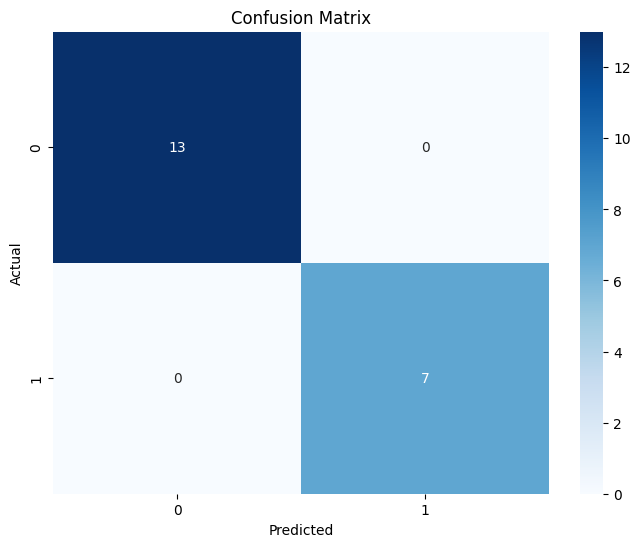


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [3]:
class KNNScratch:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        """Menyimpan data training"""
        self.X_train = X
        self.y_train = y
        
    def euclidean_distance(self, x1, x2):
        """Menghitung jarak Euclidean antara dua titik"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def manhattan_distance(self, x1, x2):
        """Menghitung jarak Manhattan antara dua titik"""
        return np.sum(np.abs(x1 - x2))
    
    def get_neighbors(self, x):
        """Menemukan K tetangga terdekat"""
        # Hitung jarak ke semua titik training
        distances = []
        for i in range(len(self.X_train)):
            if self.metric == 'euclidean':
                dist = self.euclidean_distance(x, self.X_train[i])
            else:
                dist = self.manhattan_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        # Urutkan berdasarkan jarak dan ambil K tetangga terdekat
        distances.sort(key=lambda x: x[0])
        neighbors = [x[1] for x in distances[:self.k]]
        return neighbors
    
    def predict(self, X):
        """Membuat prediksi untuk data baru"""
        predictions = []
        for x in X:
            neighbors = self.get_neighbors(x)
            # Voting mayoritas
            prediction = max(set(neighbors), key=neighbors.count)
            predictions.append(prediction)
        return np.array(predictions)

# Buat data sederhana untuk testing
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_scratch = KNNScratch(k=3)
model_scratch.fit(X_train, y_train)

# Prediksi
y_pred = model_scratch.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot data training
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
            c='blue', label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
            c='red', label='Class 1', alpha=0.5)
plt.title('Data Training')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot hasil prediksi
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
            c='blue', marker='s', label='Actual Class 0', alpha=0.5)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
            c='red', marker='s', label='Actual Class 1', alpha=0.5)
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], 
            c='lightblue', marker='^', label='Predicted Class 0', alpha=0.8)
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], 
            c='lightcoral', marker='^', label='Predicted Class 1', alpha=0.8)
plt.title('Hasil Prediksi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

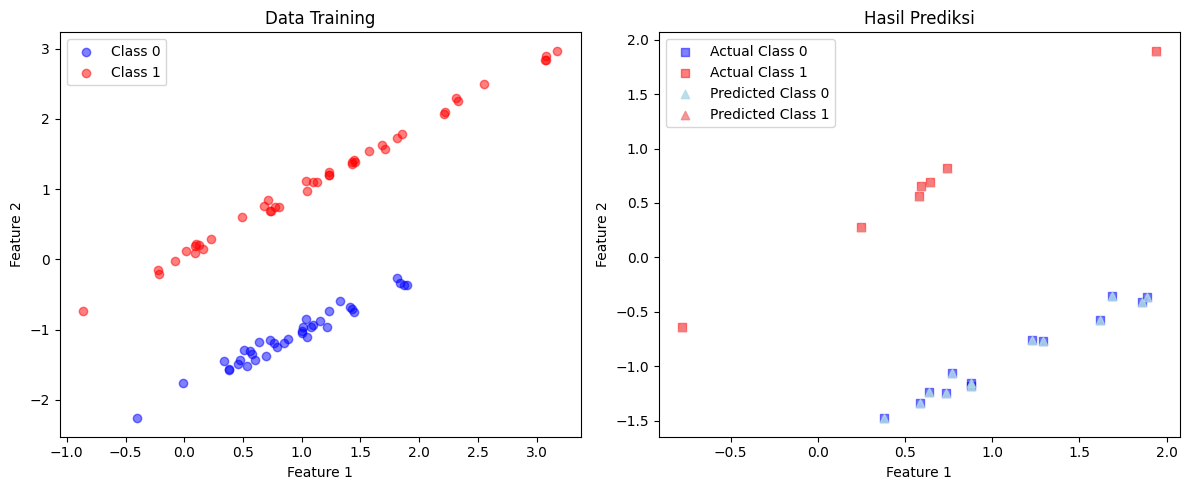

Accuracy: 1.0000


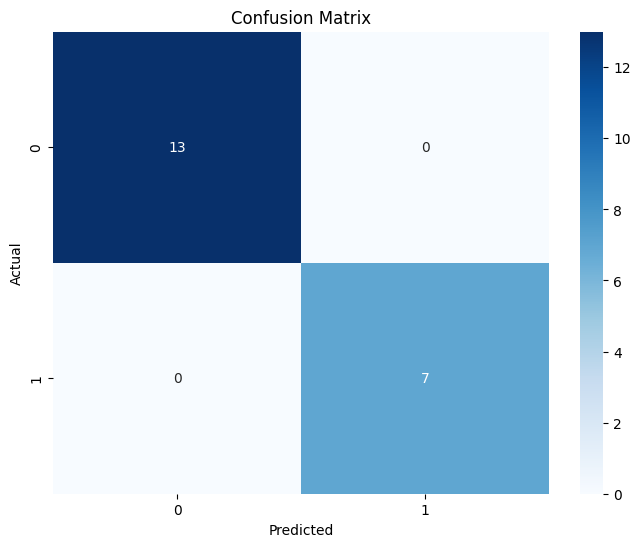

In [4]:
# Buat data sederhana untuk testing
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_scratch = KNNScratch(k=3)
model_scratch.fit(X_train, y_train)

# Prediksi
y_pred = model_scratch.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot data training
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
            c='blue', label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
            c='red', label='Class 1', alpha=0.5)
plt.title('Data Training')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot hasil prediksi
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
            c='blue', marker='s', label='Actual Class 0', alpha=0.5)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
            c='red', marker='s', label='Actual Class 1', alpha=0.5)
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], 
            c='lightblue', marker='^', label='Predicted Class 0', alpha=0.8)
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], 
            c='lightcoral', marker='^', label='Predicted Class 1', alpha=0.8)
plt.title('Hasil Prediksi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3. Implementasi dengan Scikit-learn

Sekarang kita akan menggunakan implementasi KNN dari scikit-learn dan melihat bagaimana memilih nilai K yang optimal menggunakan cross-validation.

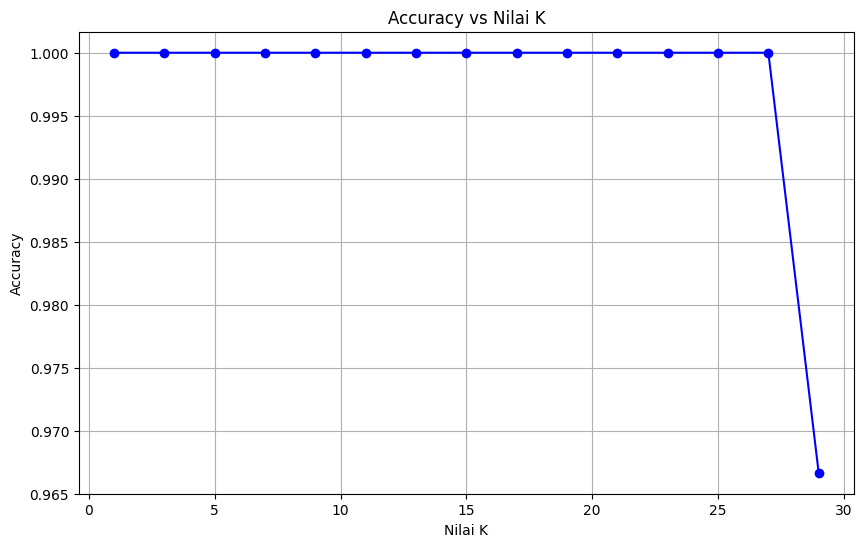

Nilai K optimal: 1

Hasil Evaluasi Model:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



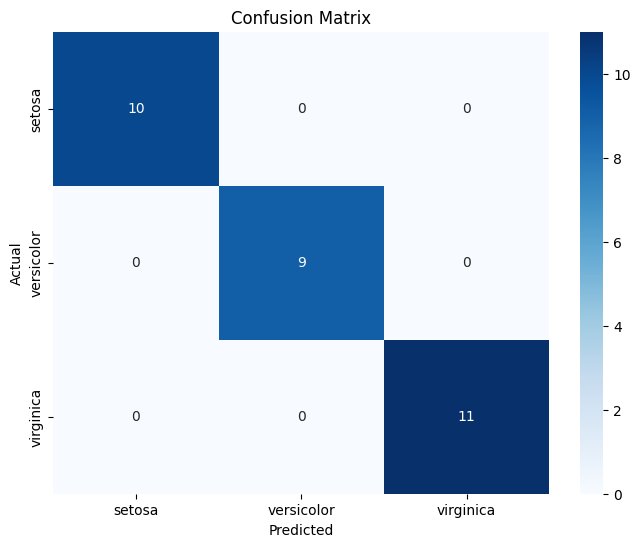

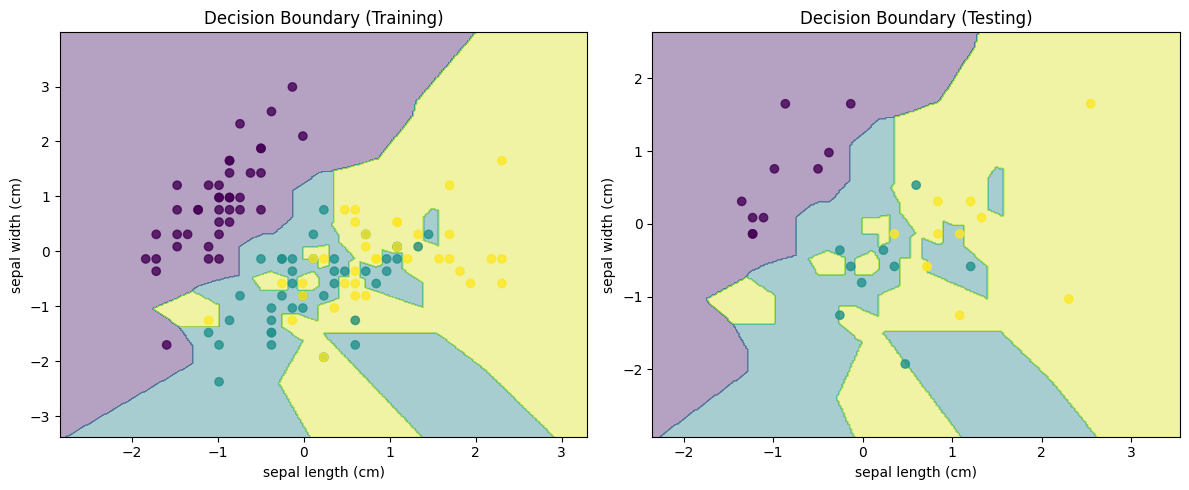

In [6]:
# Load dataset iris untuk contoh yang lebih kompleks
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mencari nilai K optimal
k_values = range(1, 31, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('Nilai K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Nilai K')
plt.grid(True)
plt.show()

# Gunakan K optimal
optimal_k = k_values[np.argmax(accuracies)]
print(f"Nilai K optimal: {optimal_k}")

# Train model dengan K optimal
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn_optimal.predict(X_test_scaled)

# Evaluasi
print("\nHasil Evaluasi Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi decision boundary (untuk 2 fitur)
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

# Plot decision boundary untuk 2 fitur pertama
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_scaled[:, :2], y_train)
plot_decision_boundary(X_train_scaled[:, :2], y_train, knn_2d, 'Decision Boundary (Training)')

# Testing data
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_scaled[:, :2], y_test, knn_2d, 'Decision Boundary (Testing)')

plt.tight_layout()
plt.show()

## 4. Studi Kasus: Klasifikasi Kualitas Anggur

Dalam studi kasus ini, kita akan menggunakan KNN untuk mengklasifikasikan kualitas anggur berdasarkan berbagai karakteristik kimianya.

### Fitur yang digunakan:
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

### Target:
- Kualitas anggur (skala 0-10)

Model Evaluation:
Accuracy: 0.5350

Classification Report:
              precision    recall  f1-score   support

           4       0.11      0.04      0.06        25
           5       0.60      0.81      0.69       117
           6       0.33      0.20      0.25        56
           7       0.00      0.00      0.00         2

    accuracy                           0.54       200
   macro avg       0.26      0.26      0.25       200
weighted avg       0.46      0.54      0.48       200



/home/dihak/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dihak/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dihak/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


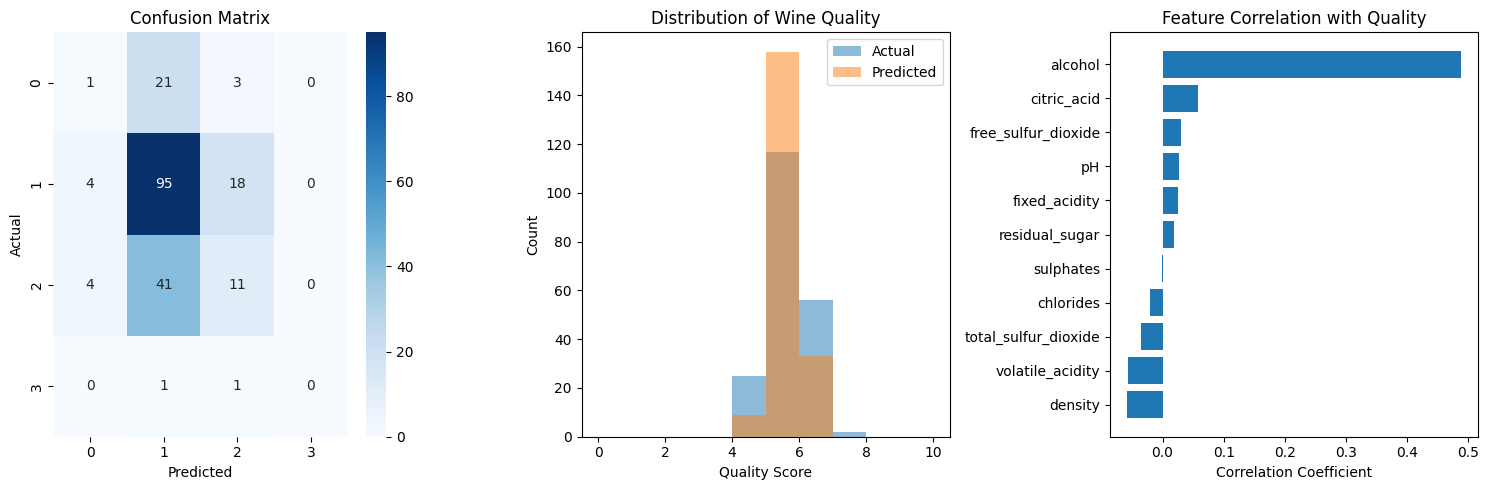


Example Prediction:
Wine characteristics:
fixed_acidity: 8.5
volatile_acidity: 0.5
citric_acid: 0.3
residual_sugar: 2.5
chlorides: 0.08
free_sulfur_dioxide: 15
total_sulfur_dioxide: 45
density: 0.996
pH: 3.3
sulphates: 0.65
alcohol: 10.5

Predicted quality: 5/10


/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
# Membuat dataset wine sederhana
np.random.seed(42)
n_samples = 1000

# Generate synthetic wine data
data = {
    'fixed_acidity': np.random.normal(8.32, 1.7, n_samples),
    'volatile_acidity': np.random.normal(0.53, 0.18, n_samples),
    'citric_acid': np.random.normal(0.27, 0.2, n_samples),
    'residual_sugar': np.random.normal(2.54, 1.4, n_samples),
    'chlorides': np.random.normal(0.087, 0.047, n_samples),
    'free_sulfur_dioxide': np.random.normal(15.87, 10.5, n_samples),
    'total_sulfur_dioxide': np.random.normal(46.47, 32.9, n_samples),
    'density': np.random.normal(0.996, 0.002, n_samples),
    'pH': np.random.normal(3.31, 0.15, n_samples),
    'sulphates': np.random.normal(0.66, 0.17, n_samples),
    'alcohol': np.random.normal(10.42, 1.07, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate quality based on some rules
quality = []
for _, wine in df.iterrows():
    score = (
        0.3 * (wine['alcohol'] - 8) +  # Higher alcohol -> better quality
        -0.2 * wine['volatile_acidity'] +  # Lower volatile acidity -> better quality
        0.2 * wine['citric_acid'] +  # Higher citric acid -> better quality
        0.1 * wine['sulphates'] +  # Higher sulphates -> better quality
        np.random.normal(0, 0.5)  # Add some noise
    )
    # Convert to 0-10 scale and round
    quality.append(max(0, min(10, int(score + 5))))

df['quality'] = quality

# Prepare data for modeling
X = df.drop('quality', axis=1)
y = df['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizations
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Distribution of actual vs predicted
plt.subplot(1, 3, 2)
plt.hist(y_test, alpha=0.5, label='Actual', bins=range(11))
plt.hist(y_pred, alpha=0.5, label='Predicted', bins=range(11))
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend()

# Feature Importance (using correlation with quality)
plt.subplot(1, 3, 3)
correlations = df.corr()['quality'].sort_values(ascending=True)
correlations = correlations.drop('quality')
plt.barh(range(len(correlations)), correlations)
plt.yticks(range(len(correlations)), correlations.index)
plt.title('Feature Correlation with Quality')
plt.xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

# Function to predict wine quality
def predict_wine_quality(features):
    """
    Predict wine quality based on its features
    """
    # Scale features
    features_scaled = scaler.transform([features])
    
    # Get prediction
    prediction = knn.predict(features_scaled)[0]
    
    return prediction

# Example prediction
sample_wine = [8.5, 0.5, 0.3, 2.5, 0.08, 15, 45, 0.996, 3.3, 0.65, 10.5]
predicted_quality = predict_wine_quality(sample_wine)

print("\nExample Prediction:")
print("Wine characteristics:")
for feature, value in zip(X.columns, sample_wine):
    print(f"{feature}: {value}")
print(f"\nPredicted quality: {predicted_quality}/10")

## 5. Latihan Mandiri

### Latihan 1: Klasifikasi Jenis Buah
Buat model KNN untuk mengklasifikasikan jenis buah berdasarkan:
- Berat
- Diameter
- Warna (RGB values)
- Tekstur
- Kekerasan

### Latihan 2: Prediksi Genre Musik
Implementasikan KNN untuk memprediksi genre musik berdasarkan:
- Tempo (BPM)
- Loudness
- Energy
- Danceability
- Acousticness
- Instrumentalness

### Latihan 3: Diagnosis Medis
Buat sistem diagnosis menggunakan KNN dengan fitur:
- Tekanan darah
- Gula darah
- BMI
- Usia
- Riwayat keluarga
- Gejala-gejala

### Tips Mengerjakan:
1. Mulai dengan eksplorasi data
2. Lakukan preprocessing yang sesuai:
   - Scaling features
   - Handling missing values
   - Encoding categorical variables
3. Eksperimen dengan berbagai nilai K
4. Gunakan cross-validation
5. Evaluasi dengan multiple metrics

### Bonus Challenge:
1. Implementasikan weighted KNN
2. Bandingkan berbagai distance metrics
3. Optimasi hyperparameter dengan grid search
4. Visualisasikan decision boundaries
5. Handle imbalanced classes

## 6. Kesimpulan dan Best Practices

### Kesimpulan:
1. KNN adalah algoritma sederhana namun powerful untuk klasifikasi dan regresi
2. Tidak memerlukan training model (lazy learning)
3. Sangat bergantung pada kualitas dan preprocessing data
4. Pemilihan K sangat mempengaruhi performa model

### Best Practices:
1. **Preprocessing Data**:
   - Selalu lakukan scaling features
   - Handle missing values
   - Remove outliers jika perlu
   - Encode categorical variables

2. **Pemilihan K**:
   - Gunakan cross-validation
   - Coba nilai K ganjil untuk menghindari tie
   - Rule of thumb: K ≈ √n (n = jumlah sampel)
   - Monitor overfitting dan underfitting

3. **Feature Engineering**:
   - Pilih features yang relevan
   - Kurangi dimensionalitas jika perlu
   - Pertimbangkan feature interactions
   - Normalisasi skala features

4. **Optimasi Performa**:
   - Gunakan struktur data yang efisien
   - Implementasikan KD-trees atau ball trees
   - Batasi jumlah features
   - Consider approximate nearest neighbors

### Kapan Menggunakan KNN:
- Dataset kecil hingga menengah
- Data numerik dengan skala similar
- Tidak ada outliers signifikan
- Features memiliki hubungan lokal yang kuat

### Keterbatasan:
- Computationally expensive untuk dataset besar
- Curse of dimensionality
- Sensitif terhadap noise dan outliers
- Memerlukan banyak memory

Remember: "Simple doesn't mean easy" - KNN mungkin sederhana, tapi memerlukan preprocessing dan tuning yang tepat untuk hasil optimal! 🎯